In [3]:
from google.colab import files
upladed=files.upload()

Saving Student Performance Factors.csv to Student Performance Factors.csv


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
# Load the dataset
data = pd.read_csv("Student Performance Factors.csv")

Missing Values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities    20
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                 19
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Shape of Data:
(6607, 20)


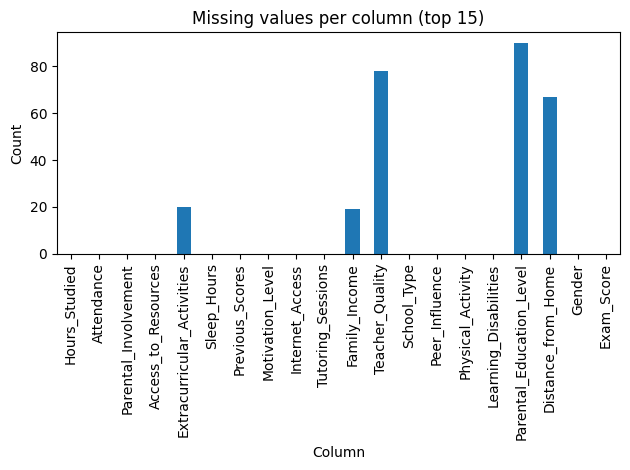

Final Missing Values:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Final Shape of cleaned Data:
(6341, 20)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:

# Check for missing values
missing_values = data.isnull().sum()
mess_shape=data.shape
print("Missing Values:")
print(missing_values)
print("\nShape of Data:")
print(mess_shape)
missing_values.plot(kind="bar")
plt.title("Missing values per column (top 15)")
plt.xlabel("Column");
plt.ylabel("Count");
plt.tight_layout();
plt.show()
# Drop rows with missing "parental level of education"
cleaned_data = data.dropna (subset=["Extracurricular_Activities","Family_Income","Teacher_Quality","Parental_Education_Level","Distance_from_Home"])
# Drop duplicate rows if there any
cleaned_data = cleaned_data.drop_duplicates()
# Final check after cleaning
final_missing = cleaned_data.isnull().sum()
final_shape = cleaned_data.shape
print("Final Missing Values:")
print(final_missing)
print("\nFinal Shape of cleaned Data:")
print(final_shape)
plt.figure()


Learning_Disabilities
No     5677
Yes     664
Name: count, dtype: int64
Mode: No
Family_Income
Low       2564
Medium    2555
High      1222
Name: count, dtype: int64


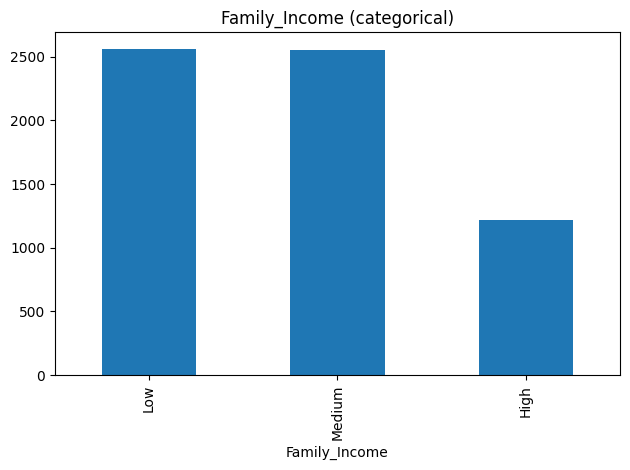

In [8]:
print("=======================================================================")
print("Q2: Derive descriptive statistics")
print("=======================================================================")

ld = cleaned_data["Learning_Disabilities"]
print(ld.value_counts())
print("Mode:", ld.mode().iloc[0] if not ld.mode().empty else None)

# Try numeric Family_Income
fi = pd.to_numeric(cleaned_data["Family_Income"], errors="coerce")
if fi.notna().mean() > 0.6:
    print("Mean:", fi.mean(), "Median:", fi.median(),
          "Mode:", (fi.mode().iloc[0] if not fi.mode().empty else None))
    plt.figure()
    plt.hist(fi.dropna(), bins=30)
    plt.title("Family_Income (numeric)")
    plt.tight_layout()
    plt.show()
else:
    print(cleaned_data["Family_Income"].value_counts())
    plt.figure()
    cleaned_data["Family_Income"].value_counts().plot(kind="bar")
    plt.title("Family_Income (categorical)")
    plt.show()



Q3: Effect of Various Factors on Exam_Score
Correlation (Hours_Studied vs. Exam_Score): 0.4441
Correlation (Sleep_Hours vs. Exam_Score): -0.0174

Mean Exam Score by School Type:
School_Type
Private    67.320228
Public     67.225953
Name: Exam_Score, dtype: float64

Mean Exam Score by Internet Access:
Internet_Access
No     66.587992
Yes    67.309662
Name: Exam_Score, dtype: float64


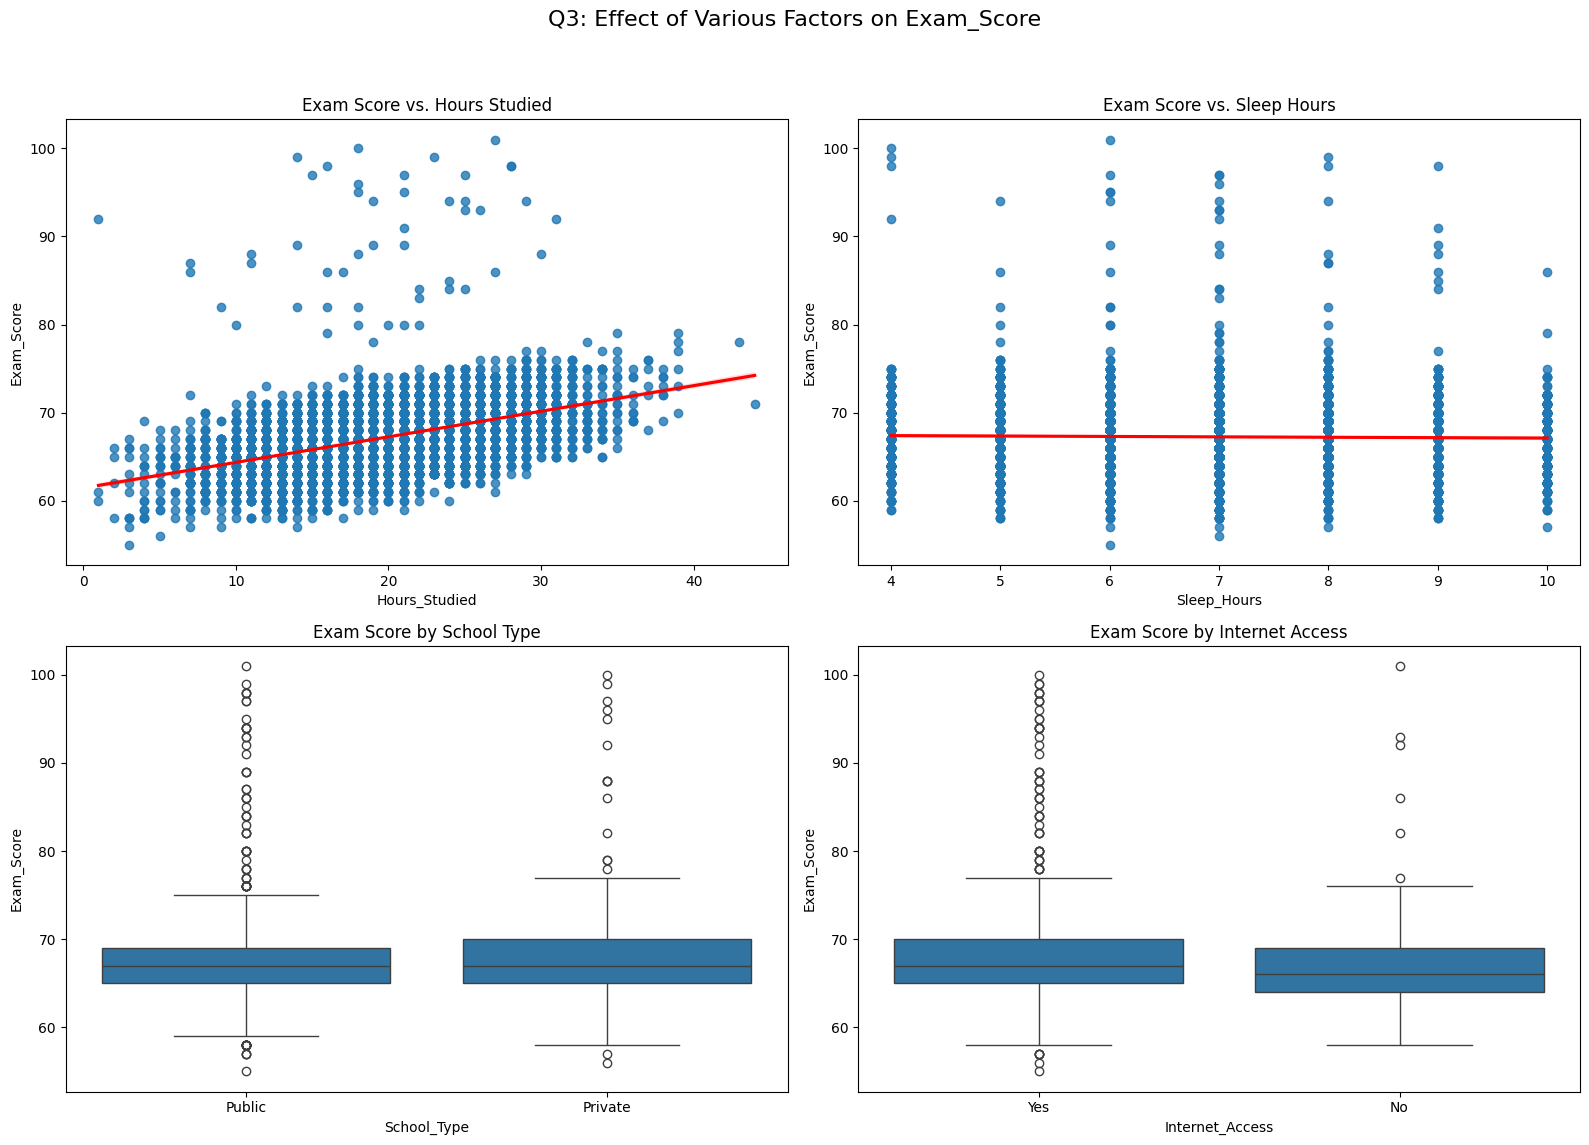

In [10]:
print("=======================================================================")
print("Q3: Effect of Various Factors on Exam_Score")
print("=======================================================================")

# Set up the plotting environment
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Q3: Effect of Various Factors on Exam_Score', fontsize=16)

# a) Hours_Studied vs. Exam_Score
sns.regplot(data=cleaned_data, x='Hours_Studied', y='Exam_Score', ax=axes[0, 0], line_kws={"color":"red"})
axes[0, 0].set_title('Exam Score vs. Hours Studied')
corr_hours = cleaned_data['Hours_Studied'].corr(cleaned_data['Exam_Score'])
print(f"Correlation (Hours_Studied vs. Exam_Score): {corr_hours:.4f}")

# b) Sleep_Hours vs. Exam_Score
sns.regplot(data=cleaned_data, x='Sleep_Hours', y='Exam_Score', ax=axes[0, 1], line_kws={"color":"red"})
axes[0, 1].set_title('Exam Score vs. Sleep Hours')
corr_sleep = cleaned_data['Sleep_Hours'].corr(cleaned_data['Exam_Score'])
print(f"Correlation (Sleep_Hours vs. Exam_Score): {corr_sleep:.4f}")

# c) School_Type vs. Exam_Score
sns.boxplot(data=cleaned_data, x='School_Type', y='Exam_Score', ax=axes[1, 0])
axes[1, 0].set_title('Exam Score by School Type')
mean_school_type = cleaned_data.groupby('School_Type')['Exam_Score'].mean()
print(f"\nMean Exam Score by School Type:\n{mean_school_type}")

# d) Internet_Access vs. Exam_Score
sns.boxplot(data=cleaned_data, x='Internet_Access', y='Exam_Score', ax=axes[1, 1])
axes[1, 1].set_title('Exam Score by Internet Access')
mean_internet = cleaned_data.groupby('Internet_Access')['Exam_Score'].mean()
print(f"\nMean Exam Score by Internet Access:\n{mean_internet}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
print("=======================================================================")
print("Q4: Conditional Probability")
print("=======================================================================")

# Methodology: Impute missing 'Parental_Education_Level' with the mode for this calculation
mode_edu = cleaned_data['Parental_Education_Level'].mode()[0]
cleaned_data['Parental_Education_Level_Imputed'] = cleaned_data['Parental_Education_Level'].fillna(mode_edu)

# Find the total number of students meeting the conditions
condition_df = cleaned_data[
    (cleaned_data['Motivation_Level'] == 'Medium') &
    (cleaned_data['Parental_Education_Level_Imputed'] == 'College')
]
total_condition_cases = len(condition_df)

# Find the number of "success" cases
success_df = condition_df[condition_df['Previous_Scores'] > 80]
total_success_cases = len(success_df)

# Calculate probability
if total_condition_cases > 0:
    probability = total_success_cases / total_condition_cases
    print(f"Total students with Medium motivation and College-educated parents: {total_condition_cases}")
    print(f"Of those, students with Previous_Scores > 80: {total_success_cases}")
    print(f"Probability: {total_success_cases} / {total_condition_cases} = {probability:.4f}")
else:
    print("No students found matching the given conditions.")



Q4: Conditional Probability
Total students with Medium motivation and College-educated parents: 959
Of those, students with Previous_Scores > 80: 347
Probability: 347 / 959 = 0.3618


In [9]:
print("=======================================================================")
print("Q5: Association between Tutoring_Sessions and Peer_Influence")
print("=======================================================================")

# Methodology: Use a Chi-Squared test of independence.
# H0: Tutoring_Sessions and Peer_Influence are independent.
# H1: Tutoring_Sessions and Peer_Influence are associated.

contingency_table = pd.crosstab(cleaned_data['Tutoring_Sessions'], cleaned_data['Peer_Influence'])
print("Contingency Table:")
print(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Squared Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Justification: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("Conclusion: There IS a statistically significant association between Tutoring Sessions and Peer Influence.")
else:
    print("Justification: The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.")
    print("Conclusion: There is NO statistically significant association between Tutoring Sessions and Peer Influence.")


Q5: Association between Tutoring_Sessions and Peer_Influence
Contingency Table:
Peer_Influence     Negative  Neutral  Positive
Tutoring_Sessions                             
0                       308      570       573
1                       427      798       873
2                       328      640       611
3                       177      306       308
4                        58      115       122
5                        21       38        42
6                         4        9         5
7                         3        2         2
8                         0        0         1

Chi-Squared Statistic: 10.2924
P-value: 0.8509
Justification: The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis.
Conclusion: There is NO statistically significant association between Tutoring Sessions and Peer Influence.


Q6: Outlier Analysis for Attendance


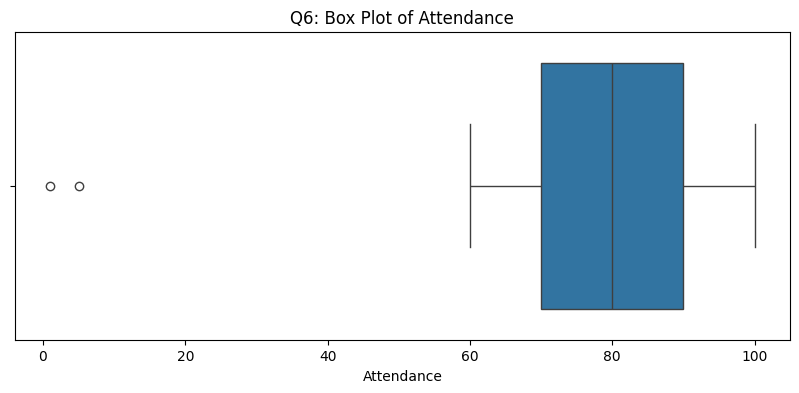

IQR Method for Outliers:
Q1: 70.0, Q3: 90.0, IQR: 20.0
Lower Bound (Q1 - 1.5*IQR): 40.00
Upper Bound (Q3 + 1.5*IQR): 120.00
Number of outliers found: 2
Yes, there are 2 outliers for Attendance.

Effect of Outliers:
The mean attendance *with* outliers is: 80.00
The mean attendance *without* outliers is: 80.02
Explanation: The outliers (low attendance scores) pull the mean downwards, making the 'average' attendance seem lower than what is typical for the majority of students.


In [10]:
print("=======================================================================")
print("Q6: Outlier Analysis for Attendance")
print("=======================================================================")

# Methodology: Identify outliers using the IQR method and visualize with a box plot.
plt.figure(figsize=(10, 4))
sns.boxplot(x=cleaned_data['Attendance'])
plt.title('Q6: Box Plot of Attendance')
plt.show() # Display Q6 plot

Q1 = cleaned_data['Attendance'].quantile(0.25)
Q3 = cleaned_data['Attendance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_data[(cleaned_data['Attendance'] < lower_bound) | (cleaned_data['Attendance'] > upper_bound)]
print(f"IQR Method for Outliers:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
print(f"Number of outliers found: {len(outliers)}")

if len(outliers) > 0:
    print(f"Yes, there are {len(outliers)} outliers for Attendance.")
    mean_with_outliers = cleaned_data['Attendance'].mean()
    # Calculate mean without outliers
    df_no_outliers = cleaned_data[(cleaned_data['Attendance'] >= lower_bound) & (cleaned_data['Attendance'] <= upper_bound)]
    mean_without_outliers = df_no_outliers['Attendance'].mean()

    print(f"\nEffect of Outliers:")
    print(f"The mean attendance *with* outliers is: {mean_with_outliers:.2f}")
    print(f"The mean attendance *without* outliers is: {mean_without_outliers:.2f}")
    print("Explanation: The outliers (low attendance scores) pull the mean downwards, making the 'average' attendance seem lower than what is typical for the majority of students.")
else:
    print("No, there are no outliers for Attendance based on the 1.5*IQR rule.")



Q7: Attribute Resulting in More Exam_Score
Correlation of Numerical Variables with Exam_Score:
Exam_Score           1.000000
Attendance           0.570359
Hours_Studied        0.444123
Previous_Scores      0.174324
Tutoring_Sessions    0.157148
Physical_Activity    0.024265
Sleep_Hours         -0.017448
Name: Exam_Score, dtype: float64

Justification: The attribute 'Attendance' has the highest positive correlation (0.5704) with 'Exam_Score'.
This indicates that 'Attendance' is the strongest linear predictor of 'Exam_Score' among the numerical variables.


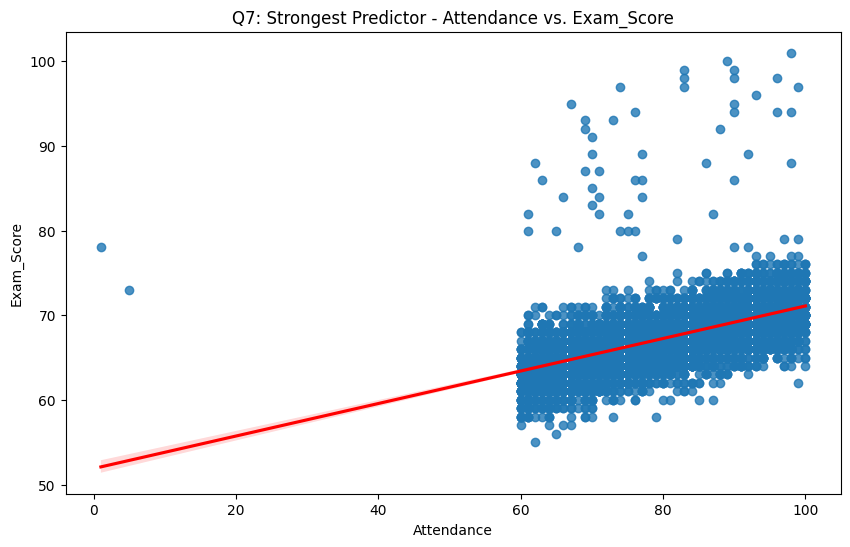

In [11]:
print("=======================================================================")
print("Q7: Attribute Resulting in More Exam_Score")
print("=======================================================================")

# Methodology: Interpret this as "Which numerical variable has the strongest correlation with Exam_Score?"
# We will calculate the correlation of all numerical features with 'Exam_Score'.
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
corr_matrix = cleaned_data[numerical_cols + ['Exam_Score']].corr()

# Get the correlation of all features with 'Exam_Score'
exam_score_corr = corr_matrix['Exam_Score'].sort_values(ascending=False)

print("Correlation of Numerical Variables with Exam_Score:")
print(exam_score_corr)

strongest_predictor = exam_score_corr.drop('Exam_Score').idxmax()
strongest_corr_value = exam_score_corr.drop('Exam_Score').max()

print(f"\nJustification: The attribute '{strongest_predictor}' has the highest positive correlation ({strongest_corr_value:.4f}) with 'Exam_Score'.")
print(f"This indicates that '{strongest_predictor}' is the strongest linear predictor of 'Exam_Score' among the numerical variables.")

# Graphically represent the strongest correlation
plt.figure(figsize=(10, 6))
sns.regplot(data=cleaned_data, x=strongest_predictor, y='Exam_Score', line_kws={"color":"red"})
plt.title(f'Q7: Strongest Predictor - {strongest_predictor} vs. Exam_Score')
plt.show()



Q8: Correlation with Extracurricular_Activities

--- Tutoring_Sessions vs. Extracurricular_Activities ---
Contingency Table:
 Extracurricular_Activities_Imputed   No   Yes
Tutoring_Sessions                            
0                                   586   865
1                                   850  1248
2                                   655   924
3                                   299   492
4                                   112   183
5                                    41    60
6                                    11     7
7                                     4     3
8                                     0     1
P-value: 0.3935
Justification: P-value >= 0.05. There is NO significant association.

--- Distance_from_Home vs. Extracurricular_Activities ---
Contingency Table:
 Extracurricular_Activities_Imputed    No   Yes
Distance_from_Home_Imputed                    
Far                                  261   373
Moderate                             735  1193
Near            

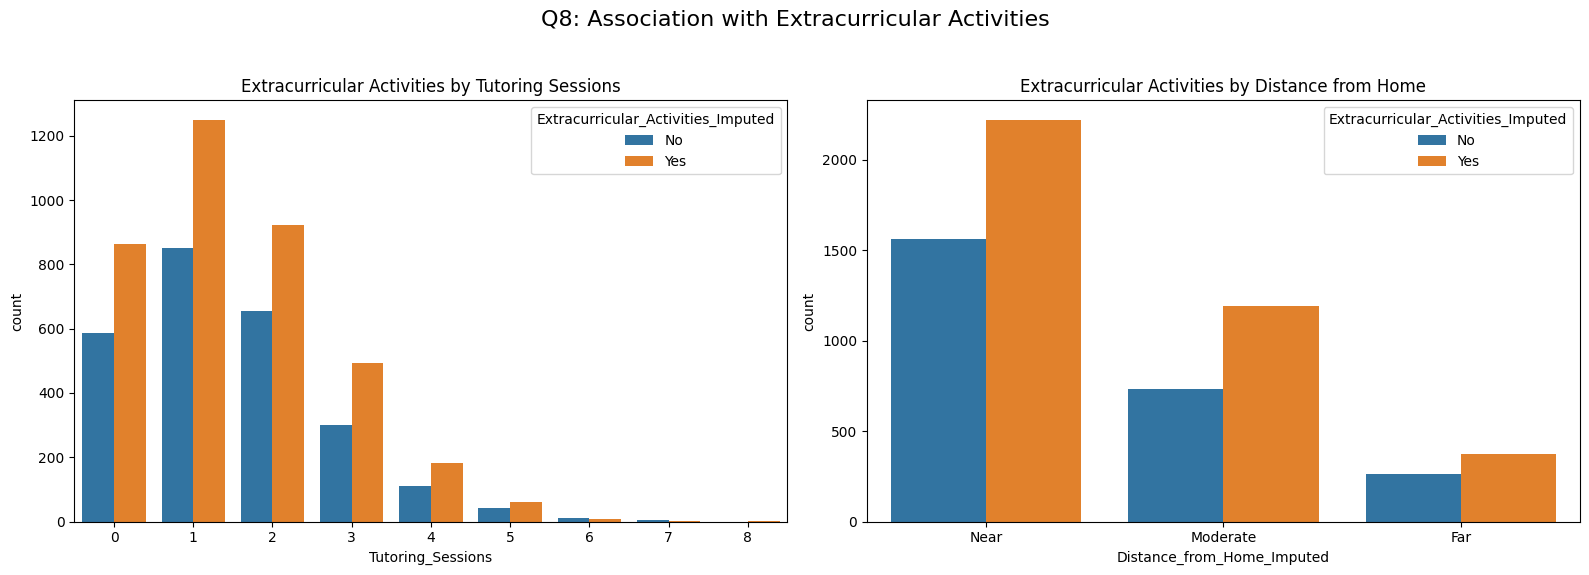

In [14]:
print("=======================================================================")
print("Q8: Correlation with Extracurricular_Activities")
print("=======================================================================")

# Methodology: Since 'Extracurricular_Activities' is categorical ("Yes", "No"),
# we will test for association using Chi-Squared.
# 'Tutoring_Sessions' (Ordinal) vs. 'Extracurricular_Activities' (Categorical)
# 'Distance_from_Home' (Categorical) vs. 'Extracurricular_Activities' (Categorical)

# Impute missing values for the relevant columns using mode
mode_extra = cleaned_data['Extracurricular_Activities'].mode()[0]
cleaned_data['Extracurricular_Activities_Imputed'] = cleaned_data['Extracurricular_Activities'].fillna(mode_extra)

mode_dist = cleaned_data['Distance_from_Home'].mode()[0]
cleaned_data['Distance_from_Home_Imputed'] = cleaned_data['Distance_from_Home'].fillna(mode_dist)

# Set up plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Q8: Association with Extracurricular Activities', fontsize=16)

# 1. Tutoring_Sessions vs. Extracurricular_Activities
print("\n--- Tutoring_Sessions vs. Extracurricular_Activities ---")
table_ts = pd.crosstab(cleaned_data['Tutoring_Sessions'], cleaned_data['Extracurricular_Activities_Imputed'])
print("Contingency Table:\n", table_ts)
chi2_ts, p_ts, _, _ = chi2_contingency(table_ts)
print(f"P-value: {p_ts:.4f}")
if p_ts < 0.05:
    print("Justification: P-value < 0.05. There IS a significant association.")
else:
    print("Justification: P-value >= 0.05. There is NO significant association.")
sns.countplot(data=cleaned_data, x='Tutoring_Sessions', hue='Extracurricular_Activities_Imputed', ax=axes[0])
axes[0].set_title('Extracurricular Activities by Tutoring Sessions')


# 2. Distance_from_Home vs. Extracurricular_Activities
print("\n--- Distance_from_Home vs. Extracurricular_Activities ---")
table_dist = pd.crosstab(cleaned_data['Distance_from_Home_Imputed'], cleaned_data['Extracurricular_Activities_Imputed'])
print("Contingency Table:\n", table_dist)
chi2_dist, p_dist, _, _ = chi2_contingency(table_dist)
print(f"P-value: {p_dist:.4f}")
if p_dist < 0.05:
    print("Justification: P-value < 0.05. There IS a significant association.")
else:
    print("Justification: P-value >= 0.05. There is NO significant association.")
sns.countplot(data=cleaned_data, x='Distance_from_Home_Imputed', hue='Extracurricular_Activities_Imputed', ax=axes[1])
axes[1].set_title('Extracurricular Activities by Distance from Home')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()